## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

In [1]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [2]:
# 1. Carregamento direto da fonte (evita o erro de arquivo não encontrado)
url = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv'
df = pd.read_csv(url)
df = df.dropna()

# 2. Tratamento de variáveis categóricas
df_preparado = pd.get_dummies(df, columns=['ocean_proximity'])

# 3. Divisão em X (preditoras) e y (alvo)
X = df_preparado.drop('median_house_value', axis=1)
y = df_preparado['median_house_value']

# 4. Particionamento dos dados (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Treinamento da Árvore Baseline
regr_baseline = DecisionTreeRegressor(random_state=42)
regr_baseline.fit(X_train, y_train)

print("Exercício 1 finalizado: Árvore treinada com sucesso.")

Exercício 1 finalizado: Árvore treinada com sucesso.


### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [3]:
# 1. Calcular o caminho de poda de complexidade de custo
path = regr_baseline.cost_complexity_pruning_path(X_train, y_train)

# 2. Extrair os valores de alpha e as respectivas impurezas
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# 3. Impressão dos resultados para verificação
print(f"Foram identificados {len(ccp_alphas)} valores de ccp_alpha para este modelo.")
print(f"Menor alpha: {ccp_alphas[0]:.5f}")
print(f"Maior alpha: {ccp_alphas[-1]:.5f}")

Foram identificados 14266 valores de ccp_alpha para este modelo.
Menor alpha: 0.00000
Maior alpha: 4092358092.78266


### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [4]:
ccp_alphas_resumido = ccp_alphas[::100]

clfs = [DecisionTreeRegressor(random_state=42, ccp_alpha=alpha).fit(X_train, y_train) 
        for alpha in ccp_alphas_resumido]

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [5]:
from sklearn.metrics import mean_squared_error

# 1. Calcular o MSE para os conjuntos de treino e teste para cada árvore na lista
train_scores = [mean_squared_error(y_train, clf.predict(X_train)) for clf in clfs]
test_scores = [mean_squared_error(y_test, clf.predict(X_test)) for clf in clfs]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

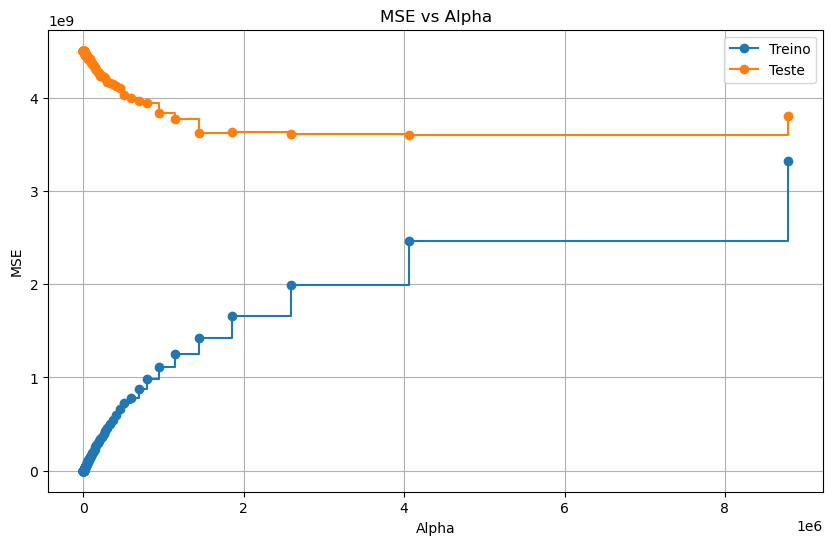

Melhor Alpha: 4064957.383224074


In [6]:

import matplotlib.pyplot as plt
%matplotlib inline

# 1. Configurar o gráfico
plt.figure(figsize=(10, 6))

# 2. Plotar MSE de treino e teste
plt.plot(ccp_alphas_resumido, train_scores, marker='o', label="Treino", drawstyle="steps-post")
plt.plot(ccp_alphas_resumido, test_scores, marker='o', label="Teste", drawstyle="steps-post")

# 3. Adicionar detalhes
plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.title("MSE vs Alpha")
plt.legend()
plt.grid(True)

# 4. Encontrar e exibir o valor explicitamente
indice_melhor_alpha = test_scores.index(min(test_scores))
melhor_alpha = ccp_alphas_resumido[indice_melhor_alpha]

# Forçar a exibição do gráfico e do valor
plt.show()
print(f"Melhor Alpha: {melhor_alpha}")

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

--- RESULTADOS DA ÁRVORE OTIMIZADA ---
Melhor Alpha encontrado: 1.223541
R-quadrado (Explicação do Modelo): 73.67%
--------------------------------------


<Figure size 2000x1000 with 0 Axes>

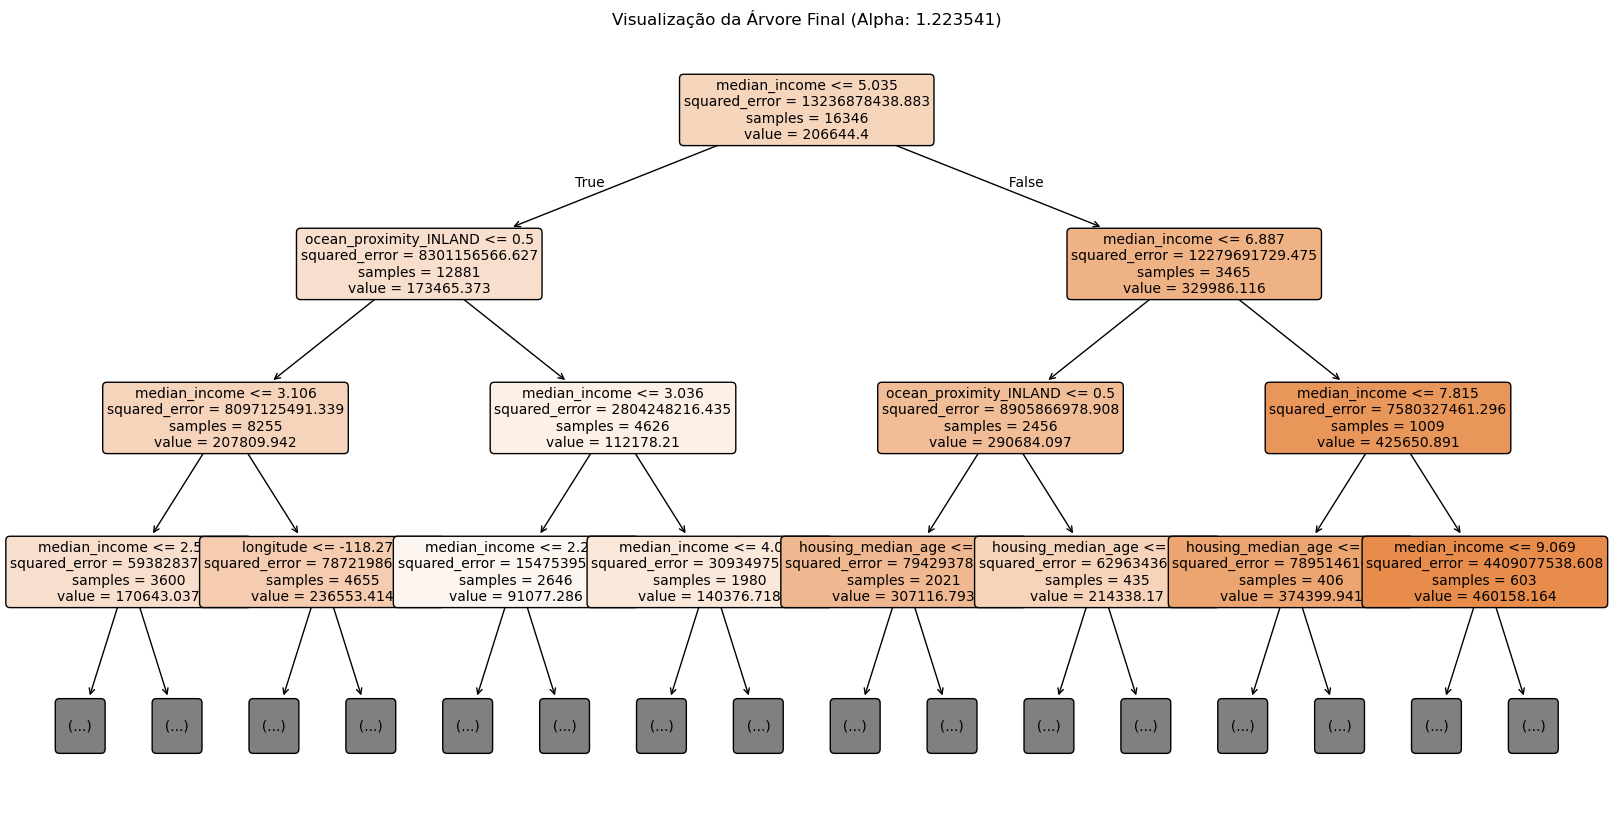

In [9]:
from sklearn.metrics import r2_score

# 1. Identificar automaticamente qual árvore da lista teve o menor MSE de teste
melhor_mse_test = min(test_scores)
indice_melhor_arvore = test_scores.index(melhor_mse_test)
arvore_final = clfs[indice_melhor_arvore]
alpha_final = ccp_alphas[indice_melhor_arvore]

# 2. Calcular o R-quadrado (Exercício 6)
r2_final = arvore_final.score(X_test, y_test)

print("--- RESULTADOS DA ÁRVORE OTIMIZADA ---")
print(f"Melhor Alpha encontrado: {alpha_final:.6f}")
print(f"R-quadrado (Explicação do Modelo): {r2_final:.2%}")
print("--------------------------------------")

# 3. Visualizar a árvore (Exercício 7)
plt.figure(figsize=(20, 10))
tree.plot_tree(arvore_final, 
               feature_names=X.columns, 
               filled=True, 
               rounded=True, 
               fontsize=10,
               max_depth=3) # Limitamos a visão para caber na tela, mas a árvore é maior
plt.title(f"Visualização da Árvore Final (Alpha: {alpha_final:.6f})")
plt.show()

### 7. Visualize esta árvore.

<Figure size 2000x1000 with 0 Axes>

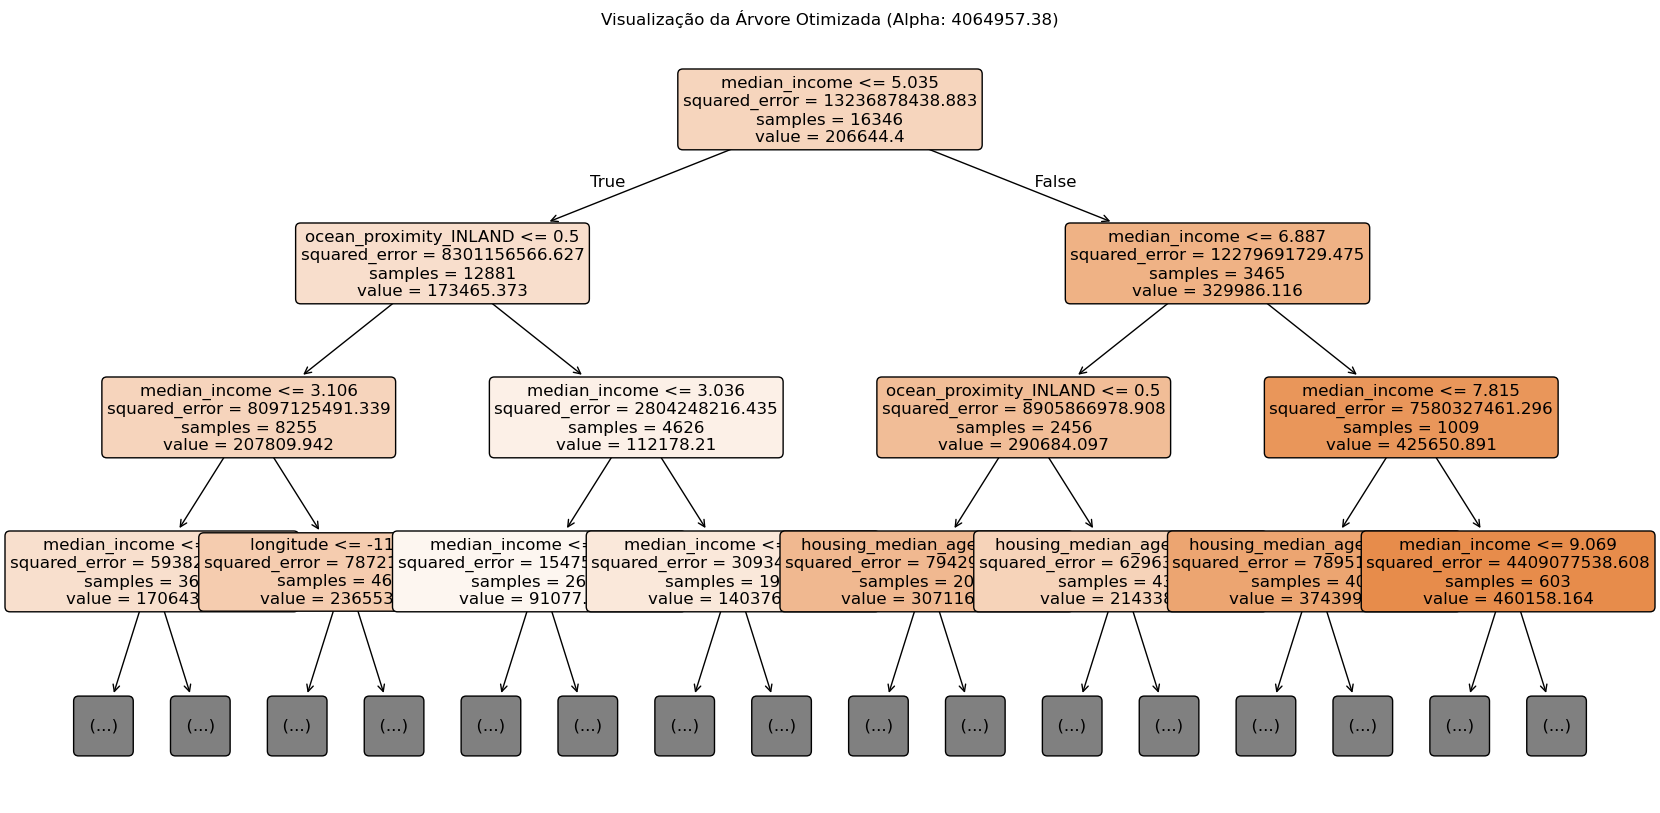

In [11]:
# 1. Identificar o índice do melhor alpha e a árvore correspondente
indice_melhor = test_scores.index(min(test_scores))
melhor_arvore = clfs[indice_melhor]
alpha_final = ccp_alphas_resumido[indice_melhor]

# 2. Configurar o tamanho da imagem
plt.figure(figsize=(20, 10))

# 3. Plotar a árvore limitada a 3 níveis para evitar travamentos
tree.plot_tree(melhor_arvore, 
               feature_names=X.columns, 
               filled=True, 
               rounded=True, 
               fontsize=12,
               max_depth=3)

# 4. Título e exibição
plt.title(f"Visualização da Árvore Otimizada (Alpha: {alpha_final:.2f})")
plt.show()